## Importing Libraries

In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [116]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns

## Loading the Data

In [28]:
data = pd.read_csv('../data/Cleaned_data.csv', index_col=0)

In [30]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

## Modelling
In this section the data will be fitted to three types of models:
1. Logistic Regression
2. Decision Trees
3. Neural Network

Based on the findings from the data analysis that the classes are imbalanced, each modelling technique will be fitted to three data samples.
Each Modelling technique will be done on three samples:
1. The original data
2. Resampling using Synthetic Minority Oversampling Technique (SMOTE)
3. Resampling using Adaptive Synthetic (ADASYN)

Both the SMOTE and the ADASYN oversampling methods are used to address the problem of imbalanced class - where the one class significantly outnumbers the other. These oversampling methods aim to balance the class distribution.

#### Creating the Samples

In [173]:
X = data.drop('Class',axis=1)
y = data['Class']

##### 1) Original Data

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.30, 
                                                    random_state=46)

##### 2) Resampling using SMOTE

In [178]:
X_resampled_smote, y_resampled_smote = SMOTE().fit_resample(X, y)

In [438]:
sns.set_style('whitegrid')
sns.set_palette('RdBu_r')
custom_palette = sns.color_palette('RdBu_r', n_colors=10)
colour1, colour2 = custom_palette[2], custom_palette[8]

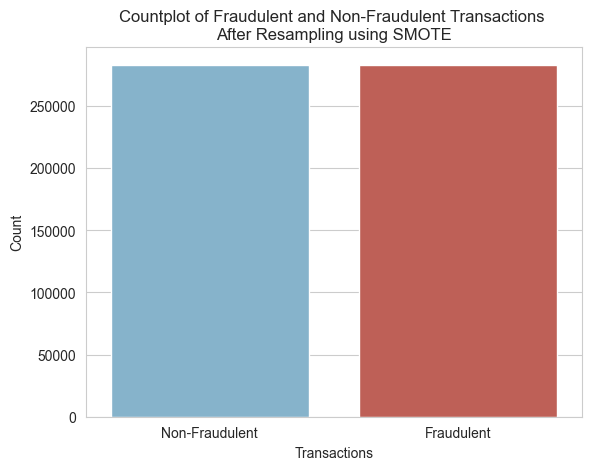

In [448]:
g = sns.countplot(data=pd.DataFrame(y_resampled_smote), x='Class', palette=[colour1, colour2])
g.set_title('Countplot of Fraudulent and Non-Fraudulent Transactions \nAfter Resampling using SMOTE')
g.set_ylabel('Count')
g.set_xlabel('Transactions')
g.set_xticklabels(['Non-Fraudulent','Fraudulent'], fontsize=10);

In [450]:
g.figure.savefig('cnt_plt_classes_SMOTE', dpi=300, bbox_inches='tight')

In [458]:
pd.DataFrame(y_resampled_smote).value_counts()

Class
0        283253
1        283253
Name: count, dtype: int64

In [184]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled_smote, y_resampled_smote,
                                                    test_size=0.30, 
                                                    random_state=46)

##### 3) Resampling using ADASYN

In [192]:
X_resampled_ASA, y_resampled_ASA = ADASYN().fit_resample(X, y)

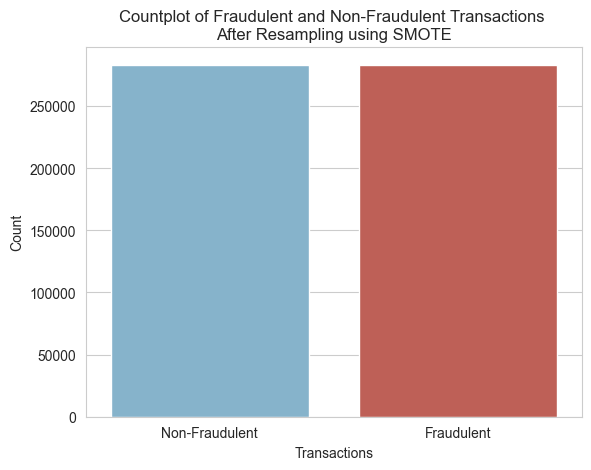

In [454]:
f = sns.countplot(data=pd.DataFrame(y_resampled_ASA), x='Class', palette=[colour1, colour2])
f.set_title('Countplot of Fraudulent and Non-Fraudulent Transactions \nAfter Resampling using SMOTE')
f.set_ylabel('Count')
f.set_xlabel('Transactions')
f.set_xticklabels(['Non-Fraudulent','Fraudulent'], fontsize=10);

In [456]:
f.figure.savefig('cnt_plt_classes_ADASYN', dpi=300, bbox_inches='tight')

In [196]:
pd.DataFrame(y_resampled_ASA).value_counts()

Class
1        283299
0        283253
Name: count, dtype: int64

In [198]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X_resampled_ASA, y_resampled_ASA,
                                                    test_size=0.30, 
                                                    random_state=46)

### Logistic Regression

In [200]:
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.metrics import classification_report, confusion_matrix

#### Logistic Regression Without Resampling

In [202]:
logmod1 = LogisticRegression(max_iter=10000)
logmod1.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [204]:
predictions_lgtest1 = logmod1.predict(X_test)
predictions_lgtrain1 = logmod1.predict(X_train)

In [206]:
print('Train')
print(confusion_matrix(y_train, predictions_lgtrain1))
print('\n')
print(classification_report(y_train, predictions_lgtrain1))
print('\n')
print('Test')
print(confusion_matrix(y_test, predictions_lgtest1))
print('\n')
print(classification_report(y_test, predictions_lgtest1))

Train
[[198233     38]
 [   131    206]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198271
           1       0.84      0.61      0.71       337

    accuracy                           1.00    198608
   macro avg       0.92      0.81      0.85    198608
weighted avg       1.00      1.00      1.00    198608



Test
[[84966    16]
 [   62    74]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84982
           1       0.82      0.54      0.65       136

    accuracy                           1.00     85118
   macro avg       0.91      0.77      0.83     85118
weighted avg       1.00      1.00      1.00     85118



#### Logistic Regression with SMOTE Resampling

In [208]:
logmod2 = LogisticRegression(max_iter=10000)
logmod2.fit(X_train2, y_train2)

LogisticRegression(max_iter=10000)

In [209]:
predictions_lgtest2 = logmod2.predict(X_test2)
predictions_lgtrain2 = logmod2.predict(X_train2)

In [210]:
print('Logistic Regression using SMOTE Resampling')
print('Train')
print(confusion_matrix(y_train2, predictions_lgtrain2))
print('\n')
print(classification_report(y_train2, predictions_lgtrain2))
print('\n')
print('Test')
print(confusion_matrix(y_test2, predictions_lgtest2))
print('\n')
print(classification_report(y_test2, predictions_lgtest2))

Logistic Regression using SMOTE Resampling
Train
[[194646   3466]
 [  7557 190885]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    198112
           1       0.98      0.96      0.97    198442

    accuracy                           0.97    396554
   macro avg       0.97      0.97      0.97    396554
weighted avg       0.97      0.97      0.97    396554



Test
[[83683  1458]
 [ 3306 81505]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85141
           1       0.98      0.96      0.97     84811

    accuracy                           0.97    169952
   macro avg       0.97      0.97      0.97    169952
weighted avg       0.97      0.97      0.97    169952



#### Logistics Regression with ADASYN Resampling

In [214]:
logmod3 = LogisticRegression(max_iter=10000)
logmod3.fit(X_train3, y_train3)

LogisticRegression(max_iter=10000)

In [215]:
predictions_lgtest3 = logmod2.predict(X_test3)
predictions_lgtrain3 = logmod2.predict(X_train3)

In [218]:
print('Logistic Regression using ADASYN Resampling')
print('Train')
print(confusion_matrix(y_train3, predictions_lgtrain3))
print('\n')
print(classification_report(y_train3, predictions_lgtrain3))
print('\n')
print('Test')
print(confusion_matrix(y_test3, predictions_lgtest3))
print('\n')
print(classification_report(y_test3, predictions_lgtest3))

Logistic Regression using ADASYN Resampling
Train
[[194498   3452]
 [  7851 190785]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97    197950
           1       0.98      0.96      0.97    198636

    accuracy                           0.97    396586
   macro avg       0.97      0.97      0.97    396586
weighted avg       0.97      0.97      0.97    396586



Test
[[83831  1472]
 [ 3487 81176]]


              precision    recall  f1-score   support

           0       0.96      0.98      0.97     85303
           1       0.98      0.96      0.97     84663

    accuracy                           0.97    169966
   macro avg       0.97      0.97      0.97    169966
weighted avg       0.97      0.97      0.97    169966



### Decision Trees
Decision trees that use boosting algorithms were used when modelling the data as they deal with bias variance trade-off, unliking bagging/ensembling algorithms which controls high variance in a model. However, a disadvantage of boosting algorithms is that they are prone to overfitting.

When modelling the data a grid search was performed to prevent overfitting by controlling model complexity.

In [384]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [404]:
tree = XGBClassifier(eval_metric='logloss', random_state=46)

param_grid = { # This will be used for all samples
    'n_estimators': [100, 200, 300], # number of sequential trees to be modeled
    'max_depth': [10, 15, 20], # maximum depth of the individual regression estimators
    'learning_rate': [0.01, 0.1]
}

grid_search_tree = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all processors
    verbose=1
)

grid_search_tree.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=46, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [405]:
print("Best Hyperparameters:", grid_search_tree.best_params_)
best_tree = grid_search_tree.best_estimator_

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [406]:
predictions_tree_train = best_tree.predict(X_train)
print('Train Accuracy:', accuracy_score(y_train, predictions_tree_train))

predictions_tree_test = best_tree.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, predictions_tree_test))

Train Accuracy: 1.0
Test Accuracy: 0.999530064146244


In [407]:
print('Gradient Boosting without Resampling')
print('Train')
print(confusion_matrix(y_train, predictions_tree_train))
print('\n')
print(classification_report(y_train, predictions_tree_train))
print('\n')
print('Test')
print(confusion_matrix(y_test, predictions_tree_test))
print('\n')
print(classification_report(y_test, predictions_tree_test))

Gradient Boosting without Resampling
Train
[[198271      0]
 [     0    337]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198271
           1       1.00      1.00      1.00       337

    accuracy                           1.00    198608
   macro avg       1.00      1.00      1.00    198608
weighted avg       1.00      1.00      1.00    198608



Test
[[84972    10]
 [   30   106]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84982
           1       0.91      0.78      0.84       136

    accuracy                           1.00     85118
   macro avg       0.96      0.89      0.92     85118
weighted avg       1.00      1.00      1.00     85118



##### With SMOTE Resampling

In [412]:
tree_smote = XGBClassifier(eval_metric='logloss', random_state=46)

grid_search_tree_smote = GridSearchCV(
    estimator=tree_smote,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all processors
    verbose=1
)

grid_search_tree_smote.fit(X_train2, y_train2)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=46, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [413]:
print("Best Hyperparameters:", grid_search_tree_smote.best_params_)
best_tree_smote = grid_search_tree_smote.best_estimator_

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [414]:
predictions_tree_smote_train = best_tree_smote.predict(X_train2)
print('Train Accuracy:', accuracy_score(y_train2, predictions_tree_smote_train))

predictions_tree_smote_test = best_tree_smote.predict(X_test2)
print("Test Accuracy:", accuracy_score(y_test, predictions_tree_test))

Train Accuracy: 1.0
Test Accuracy: 0.999530064146244


In [415]:
print('Gradient Boosting with SMOTE Resampling')
print('Train')
print(confusion_matrix(y_train2, predictions_tree_smote_train))
print('\n')
print(classification_report(y_train2, predictions_tree_smote_train))
print('\n')
print('Test')
print(confusion_matrix(y_test2, predictions_tree_smote_test))
print('\n')
print(classification_report(y_test2, predictions_tree_smote_test))

Gradient Boosting with SMOTE Resampling
Train
[[198112      0]
 [     0 198442]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198112
           1       1.00      1.00      1.00    198442

    accuracy                           1.00    396554
   macro avg       1.00      1.00      1.00    396554
weighted avg       1.00      1.00      1.00    396554



Test
[[85119    22]
 [    0 84811]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85141
           1       1.00      1.00      1.00     84811

    accuracy                           1.00    169952
   macro avg       1.00      1.00      1.00    169952
weighted avg       1.00      1.00      1.00    169952



##### With ADASYN Resampling

In [416]:
tree_asa = XGBClassifier(eval_metric='logloss', random_state=46)

grid_search_tree_asa = GridSearchCV(
    estimator=tree_asa,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='accuracy',  # Metric to optimize
    n_jobs=-1,  # Use all processors
    verbose=1
)

grid_search_tree_asa.fit(X_train3, y_train3)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=46, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1],
                         'max_depth': [10, 15, 20],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [417]:
print("Best Hyperparameters:", grid_search_tree_asa.best_params_)
best_tree_asa = grid_search_tree_asa.best_estimator_

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [418]:
predictions_tree_asa_train = best_tree_asa.predict(X_train3)
print('Train Accuracy:', accuracy_score(y_train3, predictions_tree_asa_train))

predictions_tree_asa_test = best_tree_asa.predict(X_test3)
print("Test Accuracy:", accuracy_score(y_test3, predictions_tree_asa_test))

Train Accuracy: 1.0
Test Accuracy: 0.9998411446995281


In [462]:
print('Gradient Boosting with ADASYN Resampling')
print('Train')
print(confusion_matrix(y_train3, predictions_tree_asa_train))
print('\n')
print(classification_report(y_train3, predictions_tree_asa_train))
print('\n')
print('Test')
print(confusion_matrix(y_test3, predictions_tree_asa_test))
print('\n')
print(classification_report(y_test3, predictions_tree_asa_test))

Gradient Boosting with ADASYN Resampling
Train
[[197950      0]
 [     0 198636]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    197950
           1       1.00      1.00      1.00    198636

    accuracy                           1.00    396586
   macro avg       1.00      1.00      1.00    396586
weighted avg       1.00      1.00      1.00    396586



Test
[[85276    27]
 [    0 84663]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85303
           1       1.00      1.00      1.00     84663

    accuracy                           1.00    169966
   macro avg       1.00      1.00      1.00    169966
weighted avg       1.00      1.00      1.00    169966



### Neural Networks

In [244]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

##### Neural Network without Resampling

In [260]:
model = Sequential()
model.add(Dense(units=29,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [262]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [264]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 591us/step - loss: 21.1605 - val_loss: 0.0358
Epoch 2/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 609us/step - loss: 0.0562 - val_loss: 0.0122
Epoch 3/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 3s 554us/step - loss: 0.0224 - val_loss: 0.0120
Epoch 4/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 563us/step - loss: 0.0243 - val_loss: 0.0122
Epoch 5/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 3s 560us/step - loss: 0.0202 - val_loss: 0.0123
Epoch 6/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 611us/step - loss: 0.0339 - val_loss: 0.0124
Epoch 7/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 634us/step - loss: 0.0140 - val_loss: 0.0124
Epoch 8/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 562us/step - loss: 0.0173 - val_loss: 0.0123
Epoch 9/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 561us/step - loss: 0.0231 - val_loss: 0.0125
Epoch 10/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 577us/step - loss: 0.0269 - val_loss: 0.0127
Epoch 11/600
6207/6207 ━━━━━━━━━━━━━━━━━━━━ 4s 567us/step - loss: 0.0412 - val_loss: 0.0

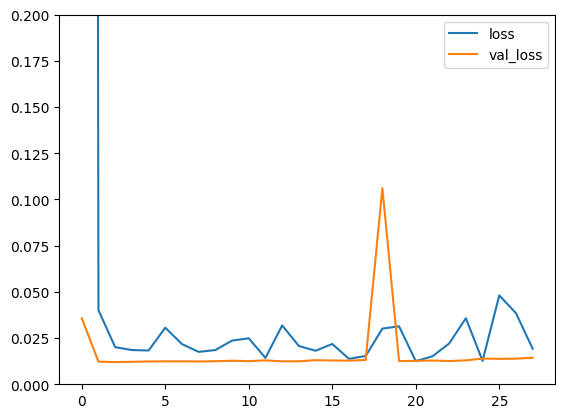

In [282]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot(ylim=[0,0.2]);

In [284]:
predictions_nn_train = (model.predict(X_train) > 0.5).astype('int32')
predictions_nn_test = (model.predict(X_test) > 0.5).astype('int32')

6207/6207 ━━━━━━━━━━━━━━━━━━━━ 2s 355us/step
2660/2660 ━━━━━━━━━━━━━━━━━━━━ 1s 316us/step


In [286]:
predictions_nn_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]], dtype=int32)

In [288]:
print('Neural Network without Resampling')
print('Train')
print(confusion_matrix(y_train, predictions_nn_train))
print('\n')
print(classification_report(y_train, predictions_nn_train))
print('\n')
print('Test')
print(confusion_matrix(y_test, predictions_nn_test))
print('\n')
print(classification_report(y_test, predictions_nn_test))

Neural Network without Resampling
Train
[[198265      6]
 [   337      0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    198271
           1       0.00      0.00      0.00       337

    accuracy                           1.00    198608
   macro avg       0.50      0.50      0.50    198608
weighted avg       1.00      1.00      1.00    198608



Test
[[84981     1]
 [  136     0]]


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84982
           1       0.00      0.00      0.00       136

    accuracy                           1.00     85118
   macro avg       0.50      0.50      0.50     85118
weighted avg       1.00      1.00      1.00     85118



#### Neural Network with SMOTE Resampling

In [349]:
model_smote = Sequential()
model_smote.add(Dense(units=29,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(units=15,activation='relu'))
model_smote.add(Dropout(0.2))

model_smote.add(Dense(units=1,activation='sigmoid'))
model_smote.compile(loss='binary_crossentropy', optimizer='adam')

In [351]:
model_smote.fit(x=X_train2, 
                y=y_train2, 
                epochs=600,
                validation_data=(X_test2, y_test2), verbose=1,
                callbacks=[early_stop]
               )

Epoch 1/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 8s 573us/step - loss: 197.4973 - val_loss: 0.6931
Epoch 2/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 565us/step - loss: 0.7097 - val_loss: 0.6931
Epoch 3/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 554us/step - loss: 0.6933 - val_loss: 0.6930
Epoch 4/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 560us/step - loss: 0.6936 - val_loss: 0.6931
Epoch 5/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 548us/step - loss: 0.6941 - val_loss: 0.6931
Epoch 6/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 595us/step - loss: 0.6937 - val_loss: 0.6930
Epoch 7/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 577us/step - loss: 0.6937 - val_loss: 0.6930
Epoch 8/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 564us/step - loss: 0.6931 - val_loss: 0.6929
Epoch 9/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 563us/step - loss: 0.6936 - val_loss: 0.6928
Epoch 10/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 584us/step - loss: 0.6942 - val_loss: 0.6929
Epoch 11/600
12393/12393 ━━━━━━━━━━━━━━━━━━━━ 7s 553us/step - loss:

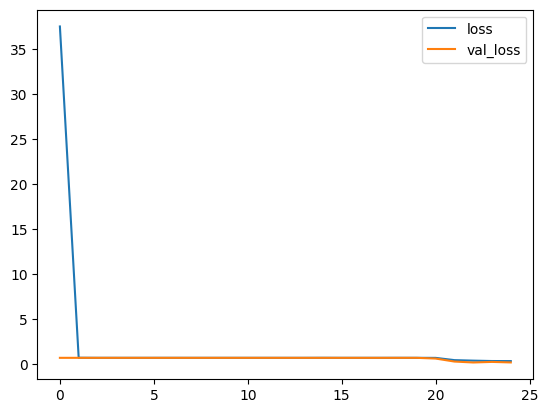

In [352]:
model_loss_smote = pd.DataFrame(model_smote.history.history)
model_loss_smote.plot();

In [353]:
predictions_nn_smote_train = (model_smote.predict(X_train2) > 0.5).astype('int32')
predictions_nn_smote_test = (model_smote.predict(X_test2) > 0.5).astype('int32')

12393/12393 ━━━━━━━━━━━━━━━━━━━━ 4s 320us/step
5311/5311 ━━━━━━━━━━━━━━━━━━━━ 2s 320us/step


In [354]:
print('Neural Network with SMOTE Resampling')
print('Train')
print(confusion_matrix(y_train2, predictions_nn_smote_train))
print('\n')
print(classification_report(y_train2, predictions_nn_smote_train))
print('\n')
print('Test')
print(confusion_matrix(y_test2, predictions_nn_smote_test))
print('\n')
print(classification_report(y_test2, predictions_nn_smote_test))

Neural Network with SMOTE Resampling
Train
[[197099   1013]
 [ 15809 182633]]


              precision    recall  f1-score   support

           0       0.93      0.99      0.96    198112
           1       0.99      0.92      0.96    198442

    accuracy                           0.96    396554
   macro avg       0.96      0.96      0.96    396554
weighted avg       0.96      0.96      0.96    396554



Test
[[84716   425]
 [ 6776 78035]]


              precision    recall  f1-score   support

           0       0.93      1.00      0.96     85141
           1       0.99      0.92      0.96     84811

    accuracy                           0.96    169952
   macro avg       0.96      0.96      0.96    169952
weighted avg       0.96      0.96      0.96    169952



In [359]:
model_smote.save('nn_smote.keras')

##### Neural Network with ADASYN Resampling

In [306]:
model_asa = Sequential()
model_asa.add(Dense(units=29,activation='relu'))
model_asa.add(Dropout(0.2))

model_asa.add(Dense(units=15,activation='relu'))
model_asa.add(Dropout(0.2))

model_asa.add(Dense(units=1,activation='sigmoid'))
model_asa.compile(loss='binary_crossentropy', optimizer='adam')

In [308]:
model_asa.fit(x=X_train3,
              y=y_train3,
              epochs=600,
              validation_data=(X_test3, y_test3), verbose=1,
              callbacks=[early_stop]
             )

Epoch 1/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 8s 562us/step - loss: 67.4330 - val_loss: 0.6931
Epoch 2/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 580us/step - loss: 0.6943 - val_loss: 0.6932
Epoch 3/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 565us/step - loss: 0.6932 - val_loss: 0.6932
Epoch 4/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 568us/step - loss: 0.6937 - val_loss: 0.6932
Epoch 5/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 561us/step - loss: 0.6935 - val_loss: 0.6931
Epoch 6/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 561us/step - loss: 0.6932 - val_loss: 0.6933
Epoch 7/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 562us/step - loss: 0.6944 - val_loss: 0.6931
Epoch 8/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 579us/step - loss: 0.6940 - val_loss: 0.6932
Epoch 9/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 552us/step - loss: 0.6969 - val_loss: 0.6932
Epoch 10/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 587us/step - loss: 0.6934 - val_loss: 0.6932
Epoch 11/600
12394/12394 ━━━━━━━━━━━━━━━━━━━━ 7s 585us/step - loss: 

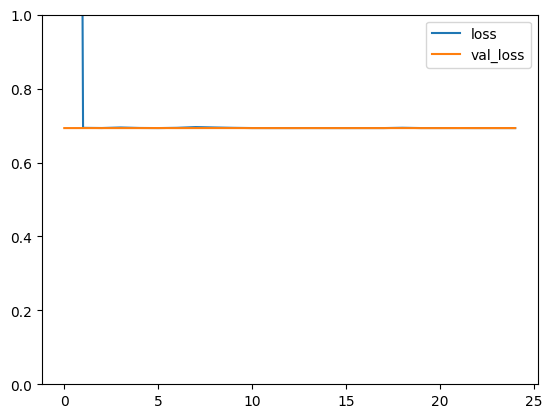

In [315]:
model_loss_asa = pd.DataFrame(model_asa.history.history)
model_loss_asa.plot(ylim=[0,1]);

In [317]:
predictions_nn_asa_train = (model_asa.predict(X_train3) > 0.5).astype('int32')
predictions_nn_asa_test = (model_asa.predict(X_test3) > 0.5).astype('int32')

12394/12394 ━━━━━━━━━━━━━━━━━━━━ 4s 355us/step
5312/5312 ━━━━━━━━━━━━━━━━━━━━ 2s 351us/step


In [435]:
print('Neural Network with ADASYN Resampling')
print('Train')
print(confusion_matrix(y_train3, predictions_nn_asa_train))
print('\n')
print(classification_report(y_train3, predictions_nn_asa_train))
print('\n')
print('Test')
print(confusion_matrix(y_test3, predictions_nn_asa_test))
print('\n')
print(classification_report(y_test3, predictions_nn_asa_test))

Neural Network with ADASYN Resampling
Train
[[     0 197950]
 [     0 198636]]




/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00    197950
           1       0.50      1.00      0.67    198636

    accuracy                           0.50    396586
   macro avg       0.25      0.50      0.33    396586
weighted avg       0.25      0.50      0.33    396586



Test
[[    0 85303]
 [    0 84663]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00     85303
           1       0.50      1.00      0.66     84663

    accuracy                           0.50    169966
   macro avg       0.25      0.50      0.33    169966
weighted avg       0.25      0.50      0.33    169966



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
